In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("sales_prediction_linear_regression_data.csv")

In [18]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Advertisement_budget  1000 non-null   float64
 1   social_media_spend    1000 non-null   float64
 2   store_openings        1000 non-null   int64  
 3   economic_index        1000 non-null   float64
 4   season                1000 non-null   object 
 5   sales                 1000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


In [19]:
df["season"].unique()

array(['Autumn', 'Winter', 'Spring', 'Summer'], dtype=object)

ENCODING THE SEASONS

In [20]:
df["season"] = df["season"].map({'Autumn': 0, 'Winter':1, 'Spring':2, 'Summer':3})

In [21]:
season_reverse_map = {0: 'Autumn', 1: 'Winter', 2: 'Spring', 3: 'Summer'}
df["season"] = df["season"].map(season_reverse_map)


SIMPLE LINEAR REGRESSION USING OLS

In [22]:

import statsmodels.api as sm


In [23]:
# INTRODUNCING SEASONS AS DUMMY VARIABLES

df_encoded = pd.get_dummies(df, columns=["season"], drop_first=True)



#season_Spring
# 1 if the season is Spring
# 0 otherwise

# season_Summer
# 1 if the season is Summer
# 0 otherwise

# season_Winter
# 1 if the season is Winter
# 0 otherwise

# If all three are 0, then the season is Autumn (base category).



DEFINED FEATURES (INDEPENDENT VARIABLES)
DEFINED TARGET (DEPENDENT VARIABLE)

In [24]:
X = df_encoded.drop("sales", axis=1)  # Features (everything except 'sales')
y = df_encoded["sales"]               # Target (sales column)


ADDING INTERCEPT TERM TO THE MODEL

In [25]:
X = sm.add_constant(X)


FIT OLS MODEL

In [30]:
X.dtypes


,0
const,float64
Advertisement_budget,float64
social_media_spend,float64
store_openings,int64
economic_index,float64
season_Spring,bool
season_Summer,bool
season_Winter,bool


converting boolean columns into integer

In [31]:
X = X.astype(float)
y = y.astype(float)


In [32]:
model = sm.OLS(y, X).fit()


In [33]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.565
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           0.000854
Time:                        14:46:36   Log-Likelihood:                -10621.
No. Observations:                1000   AIC:                         2.126e+04
Df Residuals:                     992   BIC:                         2.130e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4332.7634 

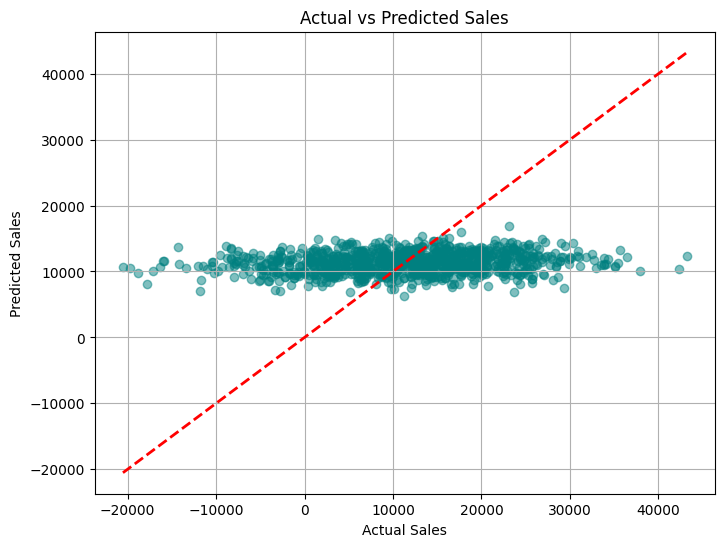

In [34]:
import matplotlib.pyplot as plt

# Generate predictions from the model
y_pred = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
